
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [21]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for importing matplotlib so we can do the line under this
from matplotlib import pyplot as plt # used for the scatterplot
import pylab # used for numpy and matplotlib in one line, but apparantly doesnt work for numpy so had to import that agian later
import pingouin as pg # used for getting the coefficient test

df_mh = pd.read_csv('MillerHadenData.csv')

# disclaimer, most of the code that has been used in this notebook was inspired by the previous notebooks and assignments. (week 1, 2 and 3)
# just putting it out there now, so I don't have to cite it every time as per the suggestion of the TA

In [22]:
# Q1a (code):
# Display first few rows of the dataframe
# every variable is ratio data, except for participant
df_mh.head()

,Participant,Abil,IQ,Home,TV
0,1,61,107,144,487
1,2,56,109,123,608
2,3,45,81,108,640
3,4,66,100,155,493
4,5,49,92,103,636


In [23]:
# Check data types and information
df_mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [24]:
# Q1b (code):
# Check for missing values
# As we can see, .info() shows us that there are of the 25 entries, 25 are non-null, so there are no missing values. 
# However, there are also more ways to do this
df_mh.isnull()
#again, we see there are no nulls

,Participant,Abil,IQ,Home,TV
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [25]:
# Check whether there is a data point for each participant on both variables

# The fact that there is no null values in any of our abil or iq variables, means that there is a data point for each participant

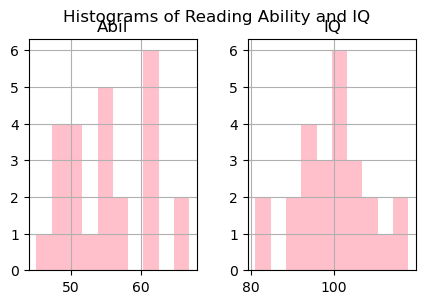

In [26]:
# Q1c (code):
# Check data distribution
# using pandas to plot a hist for the right columns
df_mh[['Abil', 'IQ']].hist(bins=10, figsize=(5, 3), color='pink')
plt.suptitle('Histograms of Reading Ability and IQ')
plt.show()

In [27]:
# the distribution is reasonably normal

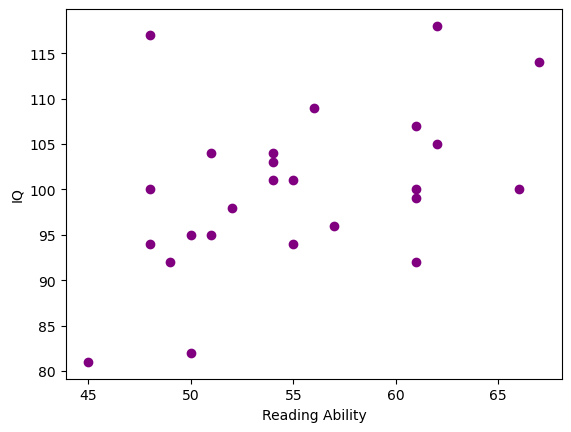

In [28]:
# Q1d (code):
# Scatter plot

# use matplotlib library and plt to make a scatter plot
plt.scatter(df_mh['Abil'], df_mh['IQ'], c="purple")
plt.xlabel("Reading Ability") 
plt.ylabel("IQ")
plt.show()

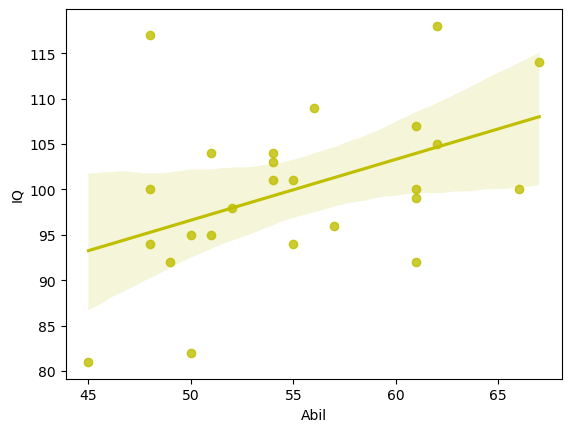

In [29]:
# Q1e (code):
# Correlation line
# use sns to plot a correlation line
plot_corr_sns = sns.regplot(x="Abil", y="IQ", color="y", data=df_mh)

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [30]:
# Q2a (answer with words):
# Because of, as we can see in the scatter plot and correlation line, the fact that the correlation line is lineair, we pick the Pearson correlation coefficient test. 
# Besides this, the distribution look reasonably normal, given the low amount of datapoints

In [31]:
# Q2b (code):
# applying the pungouin library to do a pearson coefficient test
pg.corr(df_mh["Abil"], df_mh["IQ"], method='pearson')

,n,r,CI95%,p-val,BF10,power
pearson,25,0.45117,"[0.07, 0.72]",0.023593,2.804,0.640299


In [32]:
# Q2c (answer with words):
# The result from Pearson correlation coefficient test is '0.45117'.

# Direction: What the test says about the direction of the correlation, besides seeing it in the plot, is that it is above 0, so a positive directionality. Where x increases, y increases.
# Strength: The 0,45 coefficient suggests a moderate strength of the positive direction. 



## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [33]:
# Q3a (answer in words):
# H1: Students who read a lot at home will have greater reading ability
# H0：There is no relationship between reading ability and frequently reading at home

In [34]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for dataframes
from scipy.stats import chi2_contingency ##used for making a contingency matrix

# Define the rounded average for Reading Ability and Home
average_abil = df_mh["Abil"].mean().round()
average_home = df_mh["Home"].mean().round()


# Create the Rank_Abil column
rank_abil = []

# create a for loop for the value's of Abil, under or the same as the average that we created before means it low ability, over is high
for value in df_mh["Abil"]:
    if value <= average_abil:
        rank_abil.append("Low")
    else:
        rank_abil.append("High")
        
# after the forloop the results are added to the rank_abil list, which is then made to be a column in the dataframe
df_mh["Rank_Abil"] = rank_abil
# Create the Rank_Home column

rank_home = []

# creating a for loop for infrequent or frequent, same as the abil one
for value in df_mh["Home"]:
    if value <= average_home:
        rank_home.append("Infrequent")
    else:
        rank_home.append("Frequent")

# after the for loop the results are added to the rank_home list, which is then made to be a column in the dataframe
df_mh["Rank_Home"] = rank_home

df_mh.head()



,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,High,Frequent
1,2,56,109,123,608,High,Infrequent
2,3,45,81,108,640,Low,Infrequent
3,4,66,100,155,493,High,Frequent
4,5,49,92,103,636,Low,Infrequent


In [35]:
import numpy as np #is used for the contingency matrix

In [36]:
# Q3c (code):
# Construct Contingency Matrix

# making the variables. low_infrequent means rank_abil = low AND rank_home = infrequent, etc etc.
low_infrequent = df_mh.loc[(df_mh["Rank_Home"] == "Infrequent") & (df_mh["Rank_Abil"] == "Low")]
low_frequent = df_mh.loc[(df_mh["Rank_Home"] == "Frequent") & (df_mh["Rank_Abil"] == "Low")]
high_infrequent = df_mh.loc[(df_mh["Rank_Home"] == "Infrequent") & (df_mh["Rank_Abil"] == "High")]
high_frequent = df_mh.loc[(df_mh["Rank_Home"] == "Frequent") & (df_mh["Rank_Abil"] == "High")]

# making a list so that we can append the length of the amount per variable.
contingency_data = []

# for every variable that we made before, we use len() to find the amount of people in that category
contingency_data.append(len(low_infrequent))
contingency_data.append(len(low_frequent))
contingency_data.append(len(high_infrequent))
contingency_data.append(len(high_frequent))

# use numpy to create a contingency matrix
contingency_matrix = np.array(contingency_data).reshape(2,-1)
print(contingency_matrix)

[[12  3]
 [ 2  8]]


In [37]:
# Q3d (code):
# Perform the Chi-square test

# use scipy to perform the Chi-square test
chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(contingency_matrix)
print(chi2, p_value)
print('These are the expected frequencies')
print(expected_frequencies)

# print the right observations
if p_value < 0.05:
    print("The observed differences are statiscally significant - H0 is rejected")
else:
    print("The observed differences are not statiscally significant - H1 is rejected")

6.500270562770561 0.010785807794066234
These are the expected frequencies
[[8.4 6.6]
 [5.6 4.4]]
The observed differences are statiscally significant - H0 is rejected


In [38]:
# Q3e (answer in words):
# As we can see, the p_value is below 0.05, namely: 0.0107....
# this means that the differences between reading ability and the frequency of reading at home are statistically significant. 
# H0: There is no relationship between reading ability and frequently reading at home can thus be rejected.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

### Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [39]:
import pandas as pd # used for dataframes
from scipy import stats #using this to do levene's, shapiro and t-test
import numpy as np #have not used it, but numpy is usually needed to run scipy
import matplotlib.pyplot as plt ##have not used it, but could use it for visualizations
import seaborn as sns #have not used it, but could also be used for visualizations

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [40]:
df_evaluators.info()

#apparently, there are 5 null objects in age and sex.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eval_id    39 non-null     int64  
 1   condition  39 non-null     object 
 2   age        34 non-null     float64
 3   sex        34 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.3+ KB


In [41]:
# Q4a (code)
# to calculate the mean and std for the age and of the evaluators, we first need to get rid of the rows with null values, so it doesnt mess with the average

# create a new df without the nulls
df_without_nulls = df_evaluators.dropna()

# use describe to find the standard deviation and the mean
df_without_nulls.describe()

# mean age is 30.852941 and the standard deviation for this is 6.238358

,eval_id,age,sex
count,34.000000,34.000000,34.000000
mean,18.941176,30.852941,1.882353
std,11.744609,6.238358,0.327035
min,1.000000,23.000000,1.000000
25%,9.250000,27.000000,2.000000
50%,17.500000,29.000000,2.000000
75%,29.750000,32.750000,2.000000
max,39.000000,48.000000,2.000000


In [42]:
# Q4b (code)
# Count male and female evaluators
# we can use the normal df without the nulls removed again, since it won't count the nulls
# In the 'sex' column: 1 represents males and 2 represents females
sex_counts = df_evaluators["sex"].value_counts()
print(sex_counts)
# 4 men, 30 women.

sex
2.0    30
1.0     4
Name: count, dtype: int64


### Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [43]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [44]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   eval_id   195 non-null    int64  
 1   Category  195 non-null    object 
 2   Rating    195 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.7+ KB


In [45]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
filtered_ratings = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = filtered_ratings.groupby('eval_id')['Rating'].mean().reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings], ignore_index=True)

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
2,1,hire,6.000000,listened
1,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
5,2,hire,4.000000,listened
4,2,impression,4.666667,listened


In [46]:
ratings2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 2 to 114
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eval_id    117 non-null    int64  
 1   Category   117 non-null    object 
 2   Rating     117 non-null    float64
 3   condition  117 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ KB


### Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [47]:
# Q6a (answer in words):
# Null hypothesis:

# There is no significant difference in the mean ratings for [Intellect/Hire/Impression] 
# between evaluators who listened to pitches and evaluators who read pitches.

# Alternative hypothesis:

# There is a significant difference in the mean ratings for [Intellect/Hire/Impression] 
# between evaluators who listened to pitches and evaluators who read pitches.

In [48]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.

# We should use a two-tail T test because the alternative hypothesis is non-directional: i.e. it doesnt say bigger or decrease or w/e

In [49]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?

# The independent variable if the way evaluators heard/read the pitches, since that would be the predictor of the
# dependent variable, which is the rating because that is assumed to be the outcome of the way evaluators read/listened

# plainly:
# independent variables: read/listened
# dependent variable: rating (intellect/hire/impression)


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [50]:
# Assuming your DataFrame is named ratings2
# Extract the 'Rating' values for each category
intellect_ratings = ratings2[ratings2['Category'] == 'intellect']['Rating']
impression_ratings = ratings2[ratings2['Category'] == 'impression']['Rating']
hire_ratings = ratings2[ratings2['Category'] == 'hire']['Rating']

# Display descriptive statistics .describe()
print("Intellect Ratings")
print(intellect_ratings.describe())

print("Impression Ratings")
print(impression_ratings.describe())

print("Hire Ratings")
print(hire_ratings.describe())

Intellect Ratings
count    39.000000
mean      4.717949
std       2.000787
min       0.666667
25%       3.500000
50%       5.000000
75%       6.000000
max       9.000000
Name: Rating, dtype: float64
Impression Ratings
count    39.000000
mean      5.094017
std       2.254234
min       0.333333
25%       3.666667
50%       5.333333
75%       7.000000
max       8.666667
Name: Rating, dtype: float64
Hire Ratings
count    39.000000
mean      3.871795
std       2.330343
min       0.000000
25%       2.000000
50%       4.000000
75%       5.000000
max       8.000000
Name: Rating, dtype: float64


In [51]:
from scipy.stats import shapiro, levene, ttest_ind # used for the t-test, shapiro-wilks test and levene test

#had to do this again because for some reason i got a key error when putting using the variables from the descriptive satistics part
intellect_ratings = ratings2[ratings2['Category'] == 'intellect']
hire_ratings = ratings2[ratings2['Category'] == 'hire']
impression_ratings = ratings2[ratings2['Category'] == 'impression']

In [52]:
#shapiro test on intellect rating using scipy
score_shapiro_intellect, p_val_shapiro_intellect = stats.shapiro(intellect_ratings["Rating"])
print(score_shapiro_intellect, p_val_shapiro_intellect)



0.9747602939605713 0.5182666182518005


In [53]:
#shapiro test hire rating
score_shapiro_hire, p_val_shapiro_hire = stats.shapiro(hire_ratings["Rating"])
print(score_shapiro_hire, p_val_shapiro_hire)


0.9427909851074219 0.04710369557142258


In [54]:
# shapiro test on impression
score_shapiro_impression, p_val_shapiro_impression = stats.shapiro(impression_ratings["Rating"])
print(score_shapiro_impression, p_val_shapiro_impression)


0.9595587849617004 0.17238670587539673


In [55]:
# normal for intellect, normal for impression because >p 0.05 but not normal distribution for hire because <p 0.05 , we use a Mann-Whiotney U Test for the Hire T-Test

In [56]:
# making the levene variables for impression and intellect
intellect_levene = ratings2[ratings2['Category'] == 'intellect']['Rating']
impression_levene = ratings2[ratings2['Category'] == 'impression']['Rating']

In [57]:
# Test for homogeneity of variances (Levene's test)
# we already know that the Hire variable needs a non-parametric test because it failed the normal distribution test, 
# so we only need to do the Levene test on the Intellect and Impression variables

# doing the levene test and interpreting the results
statistic, p_value = levene(intellect_levene, impression_levene)
if p_value < 0.05:
    print("Levene's test is significant - use Welch's test")
else:
    print("Levene's test is not significant - proceed")

Levene's test is not significant - proceed


In [58]:
# Independent t-tests
from scipy.stats import mannwhitneyu

#since the hire one is not normally distributed, we need to do a non-parametric test like the Mann-Whitney U Test. Therefore we import

# creating the relevant variables for the t-tests. a listened and read version for Intellect, Impression and Hire.
# for this obviously using pandas. 
intellect_listened = ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'listened')]['Rating']
intellect_read = ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'read')]['Rating']

impression_listened = ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'listened')]['Rating']
impression_read = ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'read')]['Rating']

hire_listened = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'listened')]['Rating']
hire_read = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'read')]['Rating']

# the first two are regular t-tests, the last is a mannwhitneyu test, as explained earlier.
t_stat_intellect, p_val_intellect = ttest_ind(intellect_listened, intellect_read)
t_stat_impression, p_val_impression = ttest_ind(impression_listened, impression_read)
u_stat, p_val_hire = mannwhitneyu(hire_listened, hire_read)

# making if/else to see what the results mean
if p_val_intellect < 0.05:
    print("Reject the null hypothesis for Intellect Ratings. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis for Intellect Ratings. There is no significant difference in means.")

if p_val_impression < 0.05:
    print("Reject the null hypothesis for Impression Ratings. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis for Impression Ratings. There is no significant difference in means.")

if p_val_hire < 0.05:
    print("Reject the null hypothesis for Hire Ratings. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis for Hire Ratings. There is no significant difference in means.")

Reject the null hypothesis for Intellect Ratings. There is a significant difference in means.
Reject the null hypothesis for Impression Ratings. There is a significant difference in means.
Reject the null hypothesis for Hire Ratings. There is a significant difference in means.


# Q7b (answer in words):
Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

### Descriptive statistics:
Nothing really noticeable from the descriptive statistics, we know the count, mean standard deviation, percentiles, and minimums and maximums

### Shapiro_Wilk test

We did the Shapiro_Wilk tests on the ratings for every variable to check if there was a normal distribution. What we noticed is that the P_value for Intellect and Impression were above 0.05, meaning that there is a normal distribution and we can go on to the levine test. However, the P_value for Hiring variable was 0.04710369557142258, below 0.05, meaning that we don't do the levene test on that one because we already know it needs a non-parametic test. 

### Levene's test

We used Levene's test to check for homogenity of variances between Impression and Intelect variables. The result was not significant meaning that we cannot reject the null hypothesis (the variances across different groups are equal). That means there is no significant difference in variances between Impression and Intellect, meaning we can use a parametric t-test.

### Independent t-tests

For each Ratings we did a two tailed t test between if that variable was listened or read. 
For intellect and impression variables we used a normal t-test, because the Shapiro tests and Levene's tests on these variables showed that we needed a parametric test.
For hiring, we already found out during the Shaprio_wilk test that the distribution was not normal, thus needing a non-parametric test. 

All three tests were below 0.05, meaning that there is a significant difference in the means, further meaning that we can reject the null hypothesis for all variables. 
The null hypothesis was: # There is no significant difference in the mean ratings for [Intellect/Hire/Impression] between evaluators who listened to pitches and evaluators who read pitches.

Rejecting the null hypothesis suggests that there is sufficient evidence to support the idea that there is a significant difference in the mean ratings for [Intellect/Hire/Impression] between evaluators who listened to pitches and evaluators who read pitches.